# Gradient Descent

This Jupyter notebook details the steps of the gradient descent optimizer to fit a linear regression model. <br> 
The notebook was implemented by <i>Nada Chaari</i>, PhD student at Istanbul Technical University (ITU). <br>

* <font size="4"> <font color='blue'> __Gradient Descent__ </font> is an optimization technique that can find the minimum of an objective function. In the case of linear regression, gradient Descent fit a line to data by finding the optimal values for the intercept and the slope.

In [1]:
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
     
    X = 2 * np.random.rand(100,1) # create a random feature x 
    y = 4 +3 * X+np.random.randn(100,1) # create a random  y values fitting the linear equation 

Text(0.5, 1.0, 'Sale Price vs Living Area')

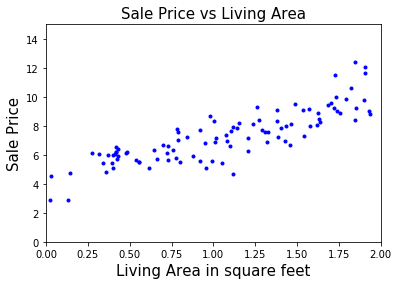

In [2]:
# plot Data
plt.plot(X,y,'b.')
plt.xlabel("Living Area in square feet", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
_ =plt.axis([0,2,0,15])
plt.title('Sale Price vs Living Area', fontsize=15)


Our goal is to find the equation of the straight line that best fits our data points since we try to solve a <font color='blue'> __linear regression__ </font> model. 

<div>
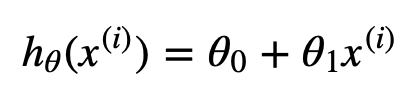
</div>

<div>
<img src="attachment:image4.png" width="250"/>
</div>

<div>
<img src="attachment:image4.png" width="500"/>
</div>

<div>
<img src="https://qph.fs.quoracdn.net/main-qimg-3b0d7655ac76edf1241f97015ee755b4" width="500"/>
</div>

We defined the cost  simple as the <font color='blue'> __squared distance__ </font>  from the ground truth. The cost function J(θ) for linear regression is defined as follows:

The function linear regression <font color='blue'> __(cost function)__ </font>  that we are trying to minimize in this case is:

<div>
<img src="Screen%20Shot%202021-07-14%20at%2014.38.21.png" width="300"/>
</div>

which can be translated as: for the current $θ$, predict the $y$ values, and subtract the actual $y$ value. Then square this error $(X_θ−y)$. This measures how far away the predicted values are from the actual value of $y$. The overall cost is scaled by $m$, the number of data points we have in y, in our example m = 100.

We need derivatives for both $θ_0$ and $θ_1$:
<div>
<img src="Screen%20Shot%202021-07-14%20at%2014.38.50.png" width="350"/>
</div>

To minimize this cost function, the theta values have to changed accordingly. The update function is defined as:

<div>
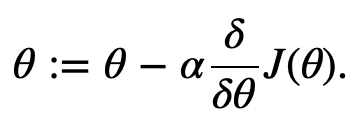
</div>

Theta is adjusted relative to the error of our predicted values, and then scaled by $m$. $α$ is the step-size <font color='blue'> __(learning rate)__ </font> that controls how far to move in the search space against the gradient each iteration of the algorithm. This value has to be chosen carefully.

<img src='https://editor.analyticsvidhya.com/uploads/90857Screenshot%20(41)_LI.jpg' width='500'  align="center">


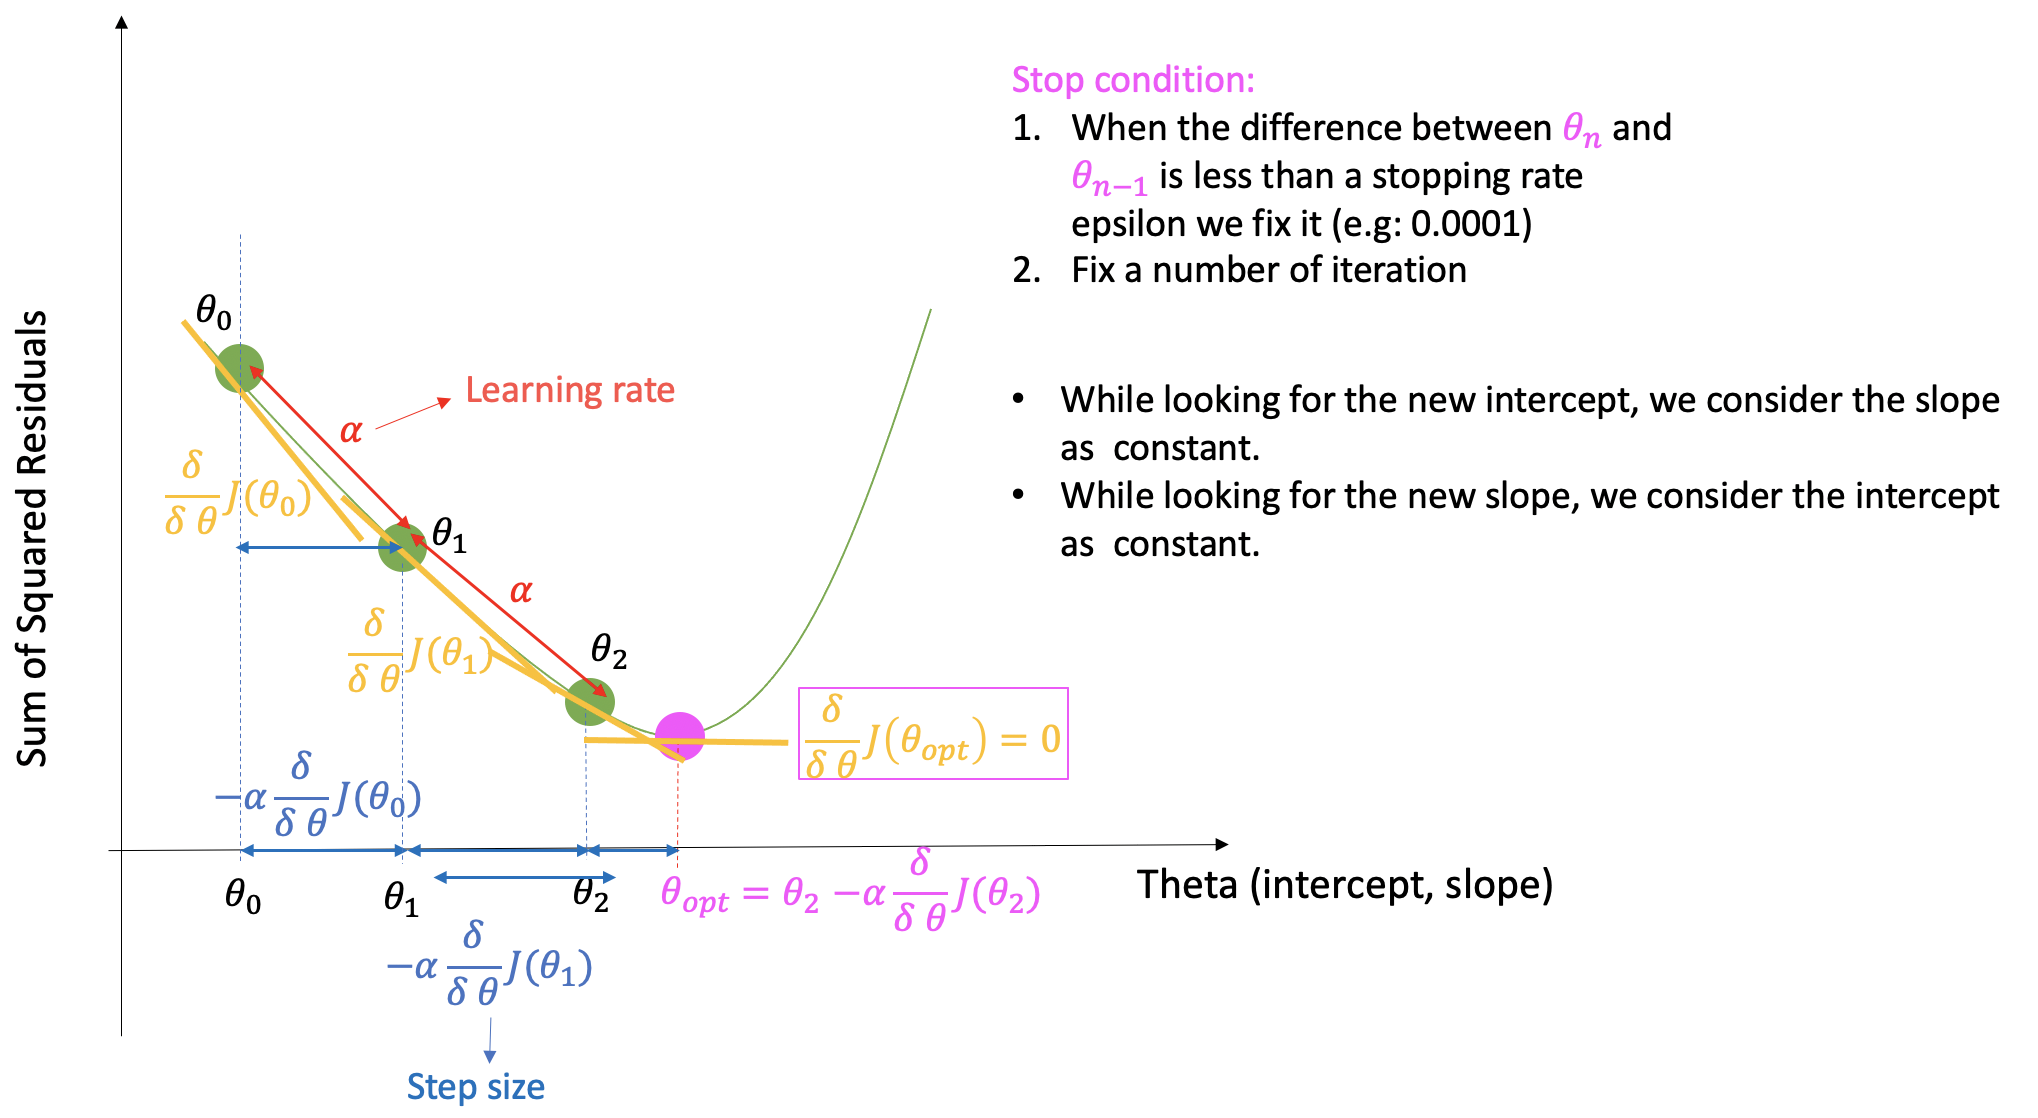

In [3]:
from IPython.display import Image
Image(filename = "/home/irekik/Downloads/image1(1).png", width = 1000, height = 700)

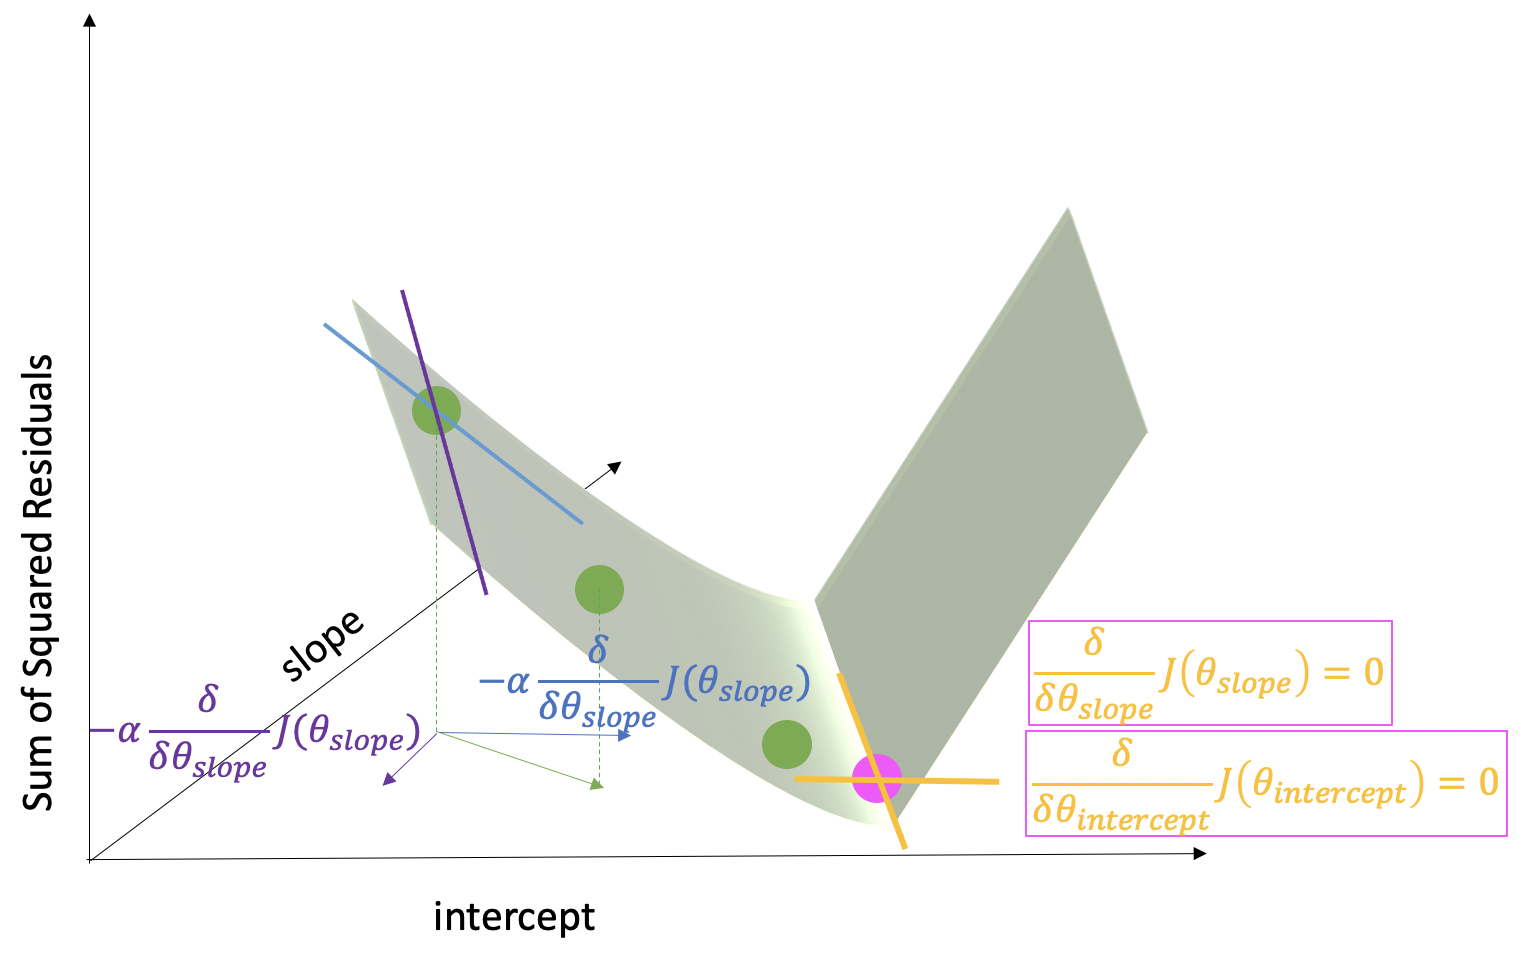

In [4]:
from IPython.display import Image
Image(filename = "/home/irekik/Downloads/image11.png", width = 900, height = 600)

<font color='red'> __Note:__ </font> If the step size is too small, the movement in the search space will be small and the search will take a long time. If the step size is too large, the search may bounce around the search space and skip over the optima.

<img src='https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png' width='1000'  align="center">

In [5]:
# MSE loss
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y)) #Compute the average sum of squared errors
    return cost

In [6]:
# gradient
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta) # multiply X with theta
        
        theta = theta -learning_rate*(1/m)*( X.T.dot((prediction - y))) # update the weights 
        # w←w+Δ, Δw= −η∇wf(w) ← w_1= w_0−η∇wf(w_0)
        
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history



In [7]:
# Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution 
lr =0.01
n_iter = 1000 # Stop Condition: Decision when to end the search procedure.

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X] # compact form to make the derivation of tetha_0 and tetha_1 in one equation block
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))


Theta0:          4.100,
Theta1:          2.988
Final cost/MSE:  4656.892


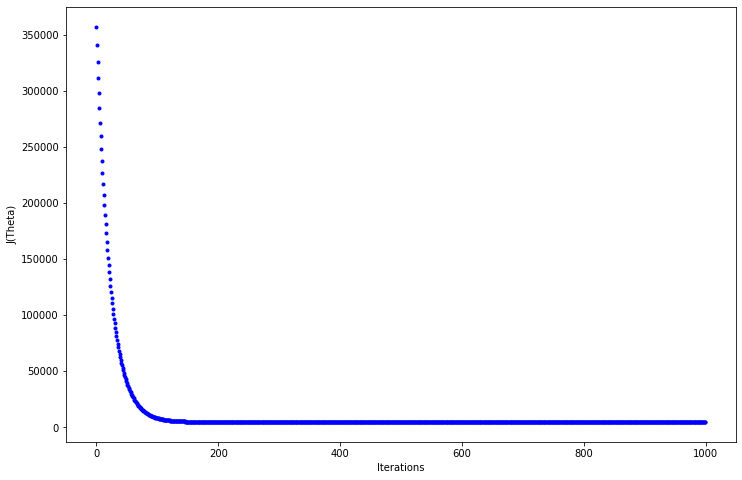

In [8]:

fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

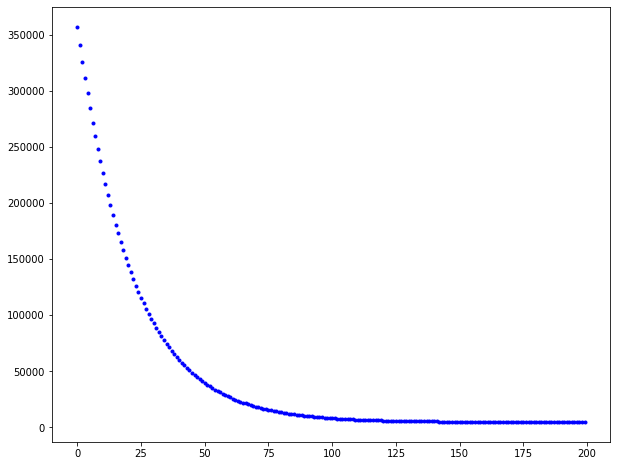

In [9]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

# Effect of different learning rates and iterations together

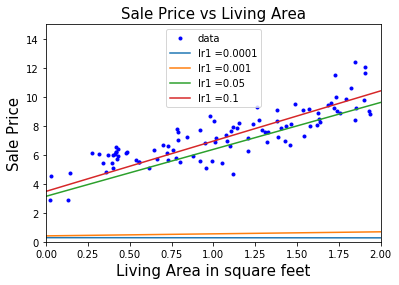

In [10]:
# compare the linear regression of different learning rate values while fixing the number of iteration of gradient descent 
plt.plot(X,y,'b.')
plt.xlabel("Living Area in square feet", fontsize=15)
plt.ylabel("Sale Price", fontsize=15)
_ =plt.axis([0,2,0,15])
plt.title('Sale Price vs Living Area', fontsize=15)
########################################
lr1 =0.0001
lr2 =0.001
lr3 =0.05
lr4 =0.1
n_iter = 20 

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X] # compact form to make the derivation of tetha_0 and tetha_1 in one equation block
theta1,_,_= gradient_descent(X_b,y,theta,lr1,n_iter)
theta2,_,_= gradient_descent(X_b,y,theta,lr2,n_iter)
theta3,_,_= gradient_descent(X_b,y,theta,lr3,n_iter)
theta4,_,_= gradient_descent(X_b,y,theta,lr4,n_iter)

x = np.linspace(-5, 20, 100)
y1 = theta1[1]*x + theta1[0]
y2 = theta2[1]*x + theta2[0]
y3 = theta3[1]*x + theta3[0]
y4 = theta4[1]*x + theta4[0]

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.legend(['data','lr1 =0.0001', 'lr1 =0.001','lr1 =0.05', 'lr1 =0.1'], loc='upper center')